In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [4]:
cars = pd.read_csv('data/cars_tesla.csv')
cargurus = pd.read_csv('data/cargurus_tesla_model_s.csv')

In [39]:
pd.set_option('display.max_columns', 500)

In [40]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

## Data cleaning:

In [30]:
cars.head()

,carfax,config,consumer_rating,consumer_review_number,deal,dealer,dealer_rating,dealer_review_number,dealer_zipcode,drivetrain,ext_color,good_deal_margin,hotornot,int_color,mileage,model,ori_price,owners,price,sellin,transmission,vin,year
0,Free CARFAX 1-Owner Report,90D,5.0,12,Good,Marin Acura,4.9,878.0,94925.0,AWD,Red,"$77,836",NOT HOT,Black,29211,Model X,NaN,1,70888,NaN,Automatic,5YJXCBE28GF010833,2016
1,CARFAX Report,85D,4.8,41,NaN,Richard (Private Seller),NaN,NaN,NaN,AWD,Silver,NaN,NOT HOT,Beige,28000,Model S,NaN,more than 1,48000,NaN,Automatic,NaN,2015
2,CARFAX Report,Mid Range,4.5,69,NaN,TRED Private Seller (East Bay),NaN,NaN,94612.0,RWD,White,NaN,HOT CAR,Other,2500,Model 3,NaN,more than 1,47004,11.0,Automatic,5YJ3E1EA4JF162481,2018
3,Free CARFAX 1-Owner Report,NaN,4.5,69,Good,Carvana,4.4,319.0,76112.0,RWD,Silver,"$52,975",HOT CAR,Black,6548,Model 3,NaN,1,47600,11.0,Automatic,5YJ3E1EA4JF017635,2018
4,Free CARFAX Report,P90D,4.8,27,Good,Carvana,4.4,319.0,8625.0,AWD,Black,"$70,734",HOT CAR,Black,18968,Model S,NaN,more than 1,66200,11.0,Automatic,5YJSA1E40GF120206,2016


In [25]:
cars.columns

Index(['carfax', 'config', 'consumer_rating', 'consumer_review_number', 'deal',
       'dealer', 'dealer_rating', 'dealer_review_number', 'dealer_zipcode',
       'drivetrain', 'ext_color', 'good_deal_margin', 'hotornot', 'int_color',
       'mileage', 'model', 'ori_price', 'owners', 'price', 'sellin',
       'transmission', 'vin', 'year'],
      dtype='object')

In [32]:
cars_column = ['year','model','config','mileage','drivetrain','transmission','ext_color','int_color','price','owners',
               'ori_price','good_deal_margin','deal','hotornot','sellin','carfax','dealer', 'dealer_rating', 'dealer_review_number', 'dealer_zipcode',
               'consumer_rating','consumer_review_number','vin']
cars1 = cars[cars_column]

### Remove cars with same vin number:

In [93]:
category_values(cars1,['vin'])


 vin
5YJSA1E40GF120206    87
5YJSA1E49GF128739    85
5YJSA1E26GF122217    80
5YJXCBE28HF076686    78
5YJSA1H18EFP47914    73
5YJSA1AC6DFP10161    62
5YJ3E1EA4JF017635    49
5YJ3E1EA5JF002867    43
5YJXCAE24HF074881    40
5YJ3E1EA9JF173413    39
5YJ3E1EA7JF062407    37
5YJ3E1EB1JF114896    32
5YJSA1E13GF142268    32
5YJ3E1EAXJF048825    32
5YJ3E1EA4JF056435    32
5YJSA1DPXCFP01752    32
5YJ3E1EA1JF003868    30
5YJSA1E25GF170775    22
5YJSA1E29HF186415    21
5YJXCBE21GF009183    16
5YJSA1H25FF099636     4
5YJSA1S16EFP42901     3
5YJSA1E17FF101950     3
5YJSA1E29JF248725     3
5YJSA1E26GF129233     3
5YJSA1S19FF081964     3
5YJSA1H19FF087626     3
5YJSA1H25FF098499     2
5YJSA1H19FF100911     2
5YJXCBE46GF001243     2
5YJ3E1EB1JF065828     2
5YJSA1E13GF172662     2
5YJ3E1EA4JF014251     2
5YJXCBE45GF028210     2
5YJSA1E19HF218948     2
5YJSA1H11EFP40206     2
5YJSA1E23GF124541     2
5YJSA1S10FFP41485     2
5YJSA1E16HF233858     1
5YJSA1E17GF133685     1
5YJSA1E17HF186873     1
5YJSA1E20F

AttributeError: 'NoneType' object has no attribute 'top'

In [89]:
cars2 = cars1[(~cars1['vin'].duplicated()) | cars1['vin'].isnull()]

In [90]:
print(cars1.shape)
print(cars2.shape)

(2130, 23)
(1202, 23)


In [94]:
cars2.head()

,year,model,config,mileage,drivetrain,transmission,ext_color,int_color,price,owners,ori_price,good_deal_margin,deal,hotornot,sellin,carfax,dealer,dealer_rating,dealer_review_number,dealer_zipcode,consumer_rating,consumer_review_number,vin
0,2016,Model X,90D,29211,AWD,Automatic,Red,Black,70888,1,NaN,"$77,836",Good,NOT HOT,NaN,Free CARFAX 1-Owner Report,Marin Acura,4.9,878.0,94925.0,5.0,12,5YJXCBE28GF010833
1,2015,Model S,85D,28000,AWD,Automatic,Silver,Beige,48000,more than 1,NaN,NaN,NaN,NOT HOT,NaN,CARFAX Report,Richard (Private Seller),NaN,NaN,NaN,4.8,41,NaN
2,2018,Model 3,Mid Range,2500,RWD,Automatic,White,Other,47004,more than 1,NaN,NaN,NaN,HOT CAR,11.0,CARFAX Report,TRED Private Seller (East Bay),NaN,NaN,94612.0,4.5,69,5YJ3E1EA4JF162481
3,2018,Model 3,NaN,6548,RWD,Automatic,Silver,Black,47600,1,NaN,"$52,975",Good,HOT CAR,11.0,Free CARFAX 1-Owner Report,Carvana,4.4,319.0,76112.0,4.5,69,5YJ3E1EA4JF017635
4,2016,Model S,P90D,18968,AWD,Automatic,Black,Black,66200,more than 1,NaN,"$70,734",Good,HOT CAR,11.0,Free CARFAX Report,Carvana,4.4,319.0,8625.0,4.8,27,5YJSA1E40GF120206


In [102]:
cars2['good_deal_margin'] = cars2['good_deal_margin'].apply(lambda x: float(str(x).replace('$','').replace(',','')))

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
pd.DataFrame(category_values(cars2,['model']))


 model
Model S    871
Model X    201
Model 3    112
Roadste     18
Name: model, dtype: int64
Nulls:  0


""


In [185]:
private_seller_bool = cars2['dealer'].str.contains('Private Seller')
ps_i = cars2[private_seller_bool].index

In [189]:
cars2.loc[ps_i,'dealer'] = "private_seller"

C:\Users\andre\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [188]:
cars2

,year,model,config,mileage,drivetrain,transmission,ext_color,int_color,price,owners,ori_price,good_deal_margin,deal,hotornot,sellin,carfax,dealer,dealer_rating,dealer_review_number,dealer_zipcode,consumer_rating,consumer_review_number,vin
0,2016,Model X,90D,29211,AWD,Automatic,Red,Black,70888,1,NaN,77836.0,Good,NOT HOT,NaN,Free CARFAX 1-Owner Report,Marin Acura,4.9,878.0,94925.0,5.0,12,5YJXCBE28GF010833
1,2015,Model S,85D,28000,AWD,Automatic,Silver,Beige,48000,more than 1,NaN,NaN,NaN,NOT HOT,NaN,CARFAX Report,private_seller,NaN,NaN,NaN,4.8,41,NaN
2,2018,Model 3,Mid Range,2500,RWD,Automatic,White,Other,47004,more than 1,NaN,NaN,NaN,HOT CAR,11.0,CARFAX Report,private_seller,NaN,NaN,94612.0,4.5,69,5YJ3E1EA4JF162481
3,2018,Model 3,NaN,6548,RWD,Automatic,Silver,Black,47600,1,NaN,52975.0,Good,HOT CAR,11.0,Free CARFAX 1-Owner Report,Carvana,4.4,319.0,76112.0,4.5,69,5YJ3E1EA4JF017635
4,2016,Model S,P90D,18968,AWD,Automatic,Black,Black,66200,more than 1,NaN,70734.0,Good,HOT CAR,11.0,Free CARFAX Report,Carvana,4.4,319.0,8625.0,4.8,27,5YJSA1E40GF120206
5,2017,Model S,P100D,9800,AWD,Automatic,Red,Black,99432,more than 1,NaN,NaN,NaN,NOT HOT,NaN,CARFAX Report,private_seller,NaN,NaN,NaN,4.7,25,NaN
6,2018,Model X,100D,2400,Unknown,Automatic,White,White,99995,more than 1,NaN,NaN,NaN,NOT HOT,NaN,CARFAX Report,private_seller,NaN,NaN,NaN,5.0,5,NaN
7,2013,Model S,Performance,57311,RWD,Automatic,Black,Black,37495,1,NaN,NaN,NaN,NOT HOT,NaN,Free CARFAX 1-Owner Report,Superior Auto Exchange,2.8,4.0,45242.0,4.9,47,5YJSA1DP9DFP04143
8,2018,Model 3,Long Range,8137,RWD,Automatic,White,Black,51000,1,NaN,54870.0,Good,NOT HOT,NaN,Free CARFAX 1-Owner Report,Santa Maria BMW Volkswagen,2.2,15.0,93455.0,4.5,69,5YJ3E1EA8JF011269
9,2017,Model S,100D,19700,AWD,Automatic,Silver,Black,74993,1,76992.0,69638.0,Fair,NOT HOT,NaN,Free CARFAX 1-Owner Report,Bozard Ford,4.8,6984.0,32084.0,4.7,25,5YJSA1E24HF216260


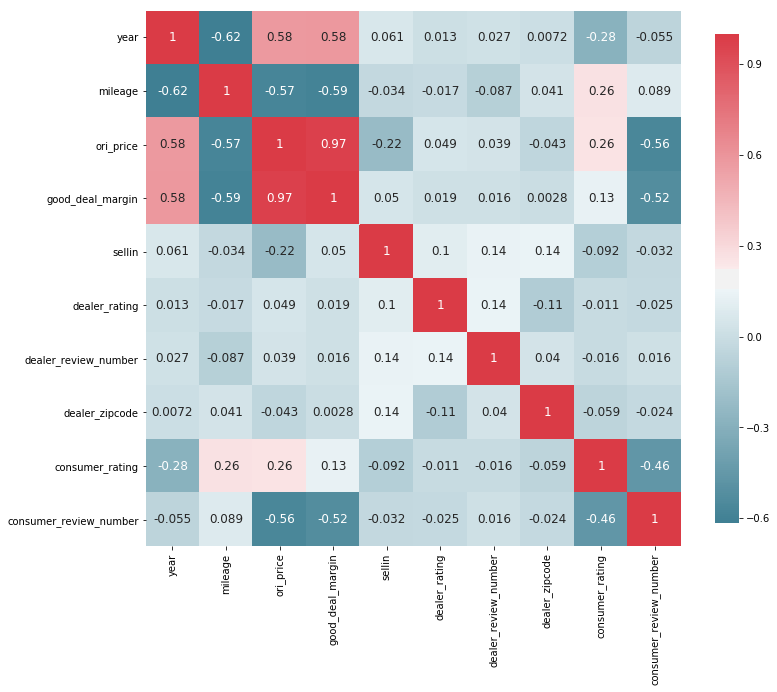

In [190]:
plot_correlation_map(cars2)

In [193]:
cargurus.head()

,Unnamed: 0,fleet,listedDate,listedDate.1,Date,price,exteriorColorName,mileage,msrpString,trimName,daysOnMarket,ownerCount,sellerRating,serviceProviderName,carYear,savingsRecommendation,vehicleIdentifier,sellerCity,dealScore,hasAccidents,priceDifferential,expectedPrice,modelName,wheelSystem,makeName
0,0,False,1554156335000,1554156335,4/1/2019,48500.0,Unknown,28988.0,"$55,151",85D AWD,33,1.0,4.17,PricePro,2016,Great Deal,5YJSA1E26GF130284,"Maumee, OH",2.435697,False,13330.0,61830,Model S,AWD,Tesla
1,1,True,1550225999000,1550225999,2/15/2019,31975.0,Gray,42274.0,NaN,Performance RWD,79,2.0,3.61,World Class Automobiles,2013,Great Deal,5YJSA1DP8DFP21435,"South River, NJ",2.275686,False,8129.0,40104,Model S,RWD,Tesla
2,2,False,1556698148000,1556698148,5/1/2019,48900.0,White,30900.0,NaN,85D AWD,4,1.0,4.50,Luxury Motors of Bay Area,2016,Great Deal,5YJSA1E23GF123244,"Pleasanton, CA",2.152671,True,11781.0,60681,Model S,AWD,Tesla
3,3,False,1538777877000,1538777877,10/5/2018,42995.0,White,33527.0,NaN,90D AWD,211,3.0,3.98,Auto Expo,2015,Great Deal,5YJSA1E26FF118828,"Great Neck, NY",2.097007,True,8193.0,51188,Model S,AWD,Tesla
4,4,False,1546545158000,1546545158,1/3/2019,33699.0,White,22456.0,NaN,60 RWD,121,1.0,3.47,XDrive Motors,2013,Great Deal,5YJSA1AG5DFP12843,"West Bridgewater, MA",2.064009,False,4436.0,38135,Model S,RWD,Tesla


In [194]:
cargurus.columns

Index(['Unnamed: 0', 'fleet', 'listedDate', 'listedDate.1', 'Date', 'price',
       'exteriorColorName', 'mileage', 'msrpString', 'trimName',
       'daysOnMarket', 'ownerCount', 'sellerRating', 'serviceProviderName',
       'carYear', 'savingsRecommendation', 'vehicleIdentifier', 'sellerCity',
       'dealScore', 'hasAccidents', 'priceDifferential', 'expectedPrice',
       'modelName', 'wheelSystem', 'makeName'],
      dtype='object')

In [ ]:
cars_column = ['year','model','config','mileage','drivetrain','transmission','ext_color','int_color','price','owners',
               'ori_price','good_deal_margin','deal','hotornot','sellin','carfax','dealer', 'dealer_rating', 'dealer_review_number', 'dealer_zipcode',
               'consumer_rating','consumer_review_number','vin']

In [197]:
cargurus_column = ['carYear','modelName','trimName','mileage','wheelSystem','exteriorColorName','fleet','hasAccidents', 'Date', 
                   'daysOnMarket','ownerCount','price','msrpString','savingsRecommendation','serviceProviderName','sellerRating',
                   'dealScore','sellerCity','priceDifferential', 'expectedPrice','vehicleIdentifier']
cargurus1 = cargurus[cargurus_column]
cargurus1['msrpString'] = cargurus1['msrpString'].apply(lambda x: float(str(x).replace('$','').replace(',','')))

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [198]:
category_values(cargurus1,['vehicleIdentifier'])
#no duplicate vin number in this data set which is good.


 vehicleIdentifier
Q19042431780LJLN7    1
5YJSA1E16FF105276    1
5YJSA1E15HF202746    1
5YJSA1E15HF202780    1
5YJSA1E15HF206540    1
5YJSA1E15HF218932    1
5YJSA1E15HF233849    1
5YJSA1E16FF100417    1
5YJSA1E16FF114351    1
5YJSA1E14GF151920    1
5YJSA1E16FF119016    1
5YJSA1E16FF119999    1
5YJSA1E16GF121995    1
5YJSA1E16GF123861    1
5YJSA1E16GF129160    1
5YJSA1E16GF130776    1
5YJSA1E15HF202486    1
5YJSA1E15HF199380    1
5YJSA1E15GF161520    1
5YJSA1E15GF158195    1
5YJSA1E15GF141896    1
5YJSA1E15GF131174    1
5YJSA1E15FF120013    1
5YJSA1E15FF119055    1
5YJSA1E15FF115300    1
5YJSA1E15FF107262    1
5YJSA1E15FF105768    1
5YJSA1E14HF233860    1
5YJSA1E14HF219294    1
5YJSA1E14HF218923    1
5YJSA1E14HF206562    1
5YJSA1E14HF206528    1
5YJSA1E14HF202530    1
5YJSA1E16GF150560    1
5YJSA1E16GF150882    1
5YJSA1E16HF202593    1
5YJSA1E18GF131671    1
5YJSA1E19HF200076    1
5YJSA1E19GF170835    1
5YJSA1E19GF131839    1
5YJSA1E19GF129153    1
5YJSA1E19FF109242    1
5YJSA1E18HF233

In [201]:
cargurus1

,carYear,modelName,trimName,mileage,wheelSystem,exteriorColorName,fleet,hasAccidents,Date,daysOnMarket,ownerCount,price,msrpString,savingsRecommendation,serviceProviderName,sellerRating,dealScore,sellerCity,priceDifferential,expectedPrice,vehicleIdentifier
0,2016,Model S,85D AWD,28988.0,AWD,Unknown,False,False,4/1/2019,33,1.0,48500.00,55151.0,Great Deal,PricePro,4.17,2.435697,"Maumee, OH",13330.00,61830,5YJSA1E26GF130284
1,2013,Model S,Performance RWD,42274.0,RWD,Gray,True,False,2/15/2019,79,2.0,31975.00,NaN,Great Deal,World Class Automobiles,3.61,2.275686,"South River, NJ",8129.00,40104,5YJSA1DP8DFP21435
2,2016,Model S,85D AWD,30900.0,AWD,White,False,True,5/1/2019,4,1.0,48900.00,NaN,Great Deal,Luxury Motors of Bay Area,4.50,2.152671,"Pleasanton, CA",11781.00,60681,5YJSA1E23GF123244
3,2015,Model S,90D AWD,33527.0,AWD,White,False,True,10/5/2018,211,3.0,42995.00,NaN,Great Deal,Auto Expo,3.98,2.097007,"Great Neck, NY",8193.00,51188,5YJSA1E26FF118828
4,2013,Model S,60 RWD,22456.0,RWD,White,False,False,1/3/2019,121,1.0,33699.00,NaN,Great Deal,XDrive Motors,3.47,2.064009,"West Bridgewater, MA",4436.00,38135,5YJSA1AG5DFP12843
5,2013,Model S,60 RWD,34970.0,RWD,Gray,False,False,4/26/2019,8,1.0,31995.00,NaN,Great Deal,Highline Auto Sales,4.45,2.003574,"Willowbrook, IL",4736.00,36731,5YJSA1CG3DFP22459
6,2016,Model S,P90D AWD,39000.0,AWD,Blue,False,False,5/4/2019,0,2.0,60500.00,108000.0,Great Deal,NaN,NaN,1.987337,"Round Rock, TX",9431.00,69931,5YJSA1E42GF127898
7,2013,Model S,60 RWD,59640.0,RWD,Gray,False,False,6/13/2018,326,1.0,29888.00,69900.0,Great Deal,Chicago Auto Network,4.71,1.896066,"Mokena, IL",4075.00,33963,5YJSA1AC6DFP10371
8,2018,Model S,100D AWD,3902.0,AWD,Black,False,False,5/2/2019,2,1.0,79999.00,NaN,Great Deal,Jersey Motors,4.33,1.868573,"Teterboro, NJ",7013.00,87012,5YJSA1E27JF264244
9,2017,Model S,75 RWD,21360.0,RWD,Black,True,False,4/18/2019,17,1.0,49863.00,49863.0,Great Deal,Bill Brandt Ford,4.17,1.836817,"Brentwood, CA",4526.00,54389,5YJSA1E18HF202742


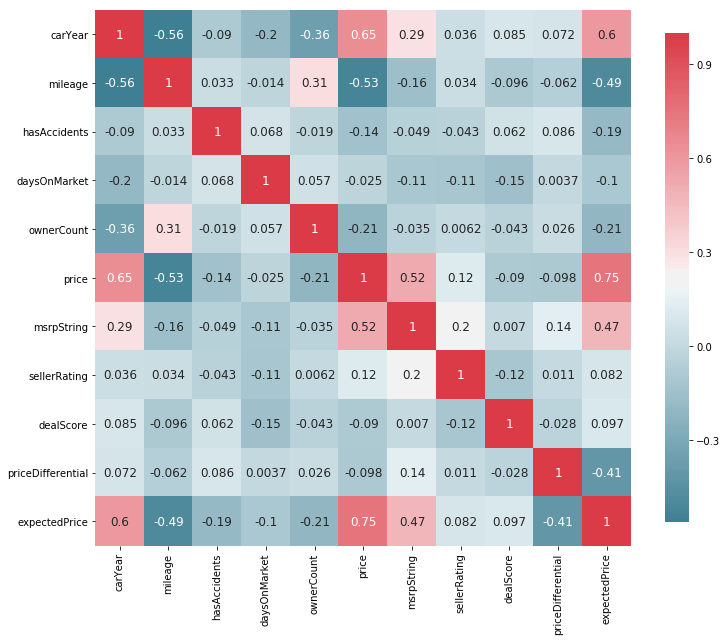

In [202]:
plot_correlation_map(cargurus1)

## Data inspection:

In [204]:
cars2.describe()

,year,mileage,ori_price,good_deal_margin,sellin,dealer_rating,dealer_review_number,dealer_zipcode,consumer_rating,consumer_review_number
count,1202.000000,1202.000000,161.000000,1000.000000,128.000000,968.000000,968.000000,1078.000000,1202.000000,1202.000000
mean,2015.489185,32067.221298,56522.409938,57253.627000,8.421875,4.377273,545.313017,63065.191095,4.807820,32.159734
std,1.869239,23038.046550,17537.891812,18597.889014,2.451448,0.744355,1870.147132,30111.576128,0.144642,17.587306
min,2008.000000,35.000000,28555.000000,20111.000000,3.000000,1.000000,1.000000,1545.000000,4.000000,4.000000
25%,2014.000000,15432.500000,42595.000000,44446.250000,6.000000,4.100000,22.000000,33213.750000,4.800000,17.000000
50%,2016.000000,27584.500000,52493.000000,53722.000000,10.000000,4.600000,69.000000,75006.000000,4.800000,33.000000
75%,2017.000000,43631.250000,70760.000000,66437.000000,11.000000,4.900000,320.250000,92111.000000,4.900000,41.000000
max,2018.000000,158000.000000,103998.000000,149282.000000,11.000000,5.000000,15688.000000,99301.000000,5.000000,69.000000


In [213]:
cars2.isnull().sum()

year                         0
model                        0
config                      67
mileage                      0
drivetrain                   0
transmission                 0
ext_color                    0
int_color                    0
price                        0
owners                       0
ori_price                 1041
good_deal_margin           202
deal                       204
hotornot                     0
sellin                    1074
carfax                       0
dealer                       0
dealer_rating              234
dealer_review_number       234
dealer_zipcode             124
consumer_rating              0
consumer_review_number       0
vin                         77
dtype: int64

In [219]:
cars2['deal'] = cars2['deal'].fillna('not_rating')

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


year
2016    267
2015    215
2018    210
2017    171
2013    164
Name: year, dtype: int64


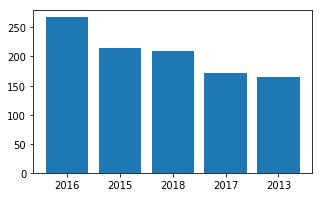

model
Model S    871
Model X    201
Model 3    112
Roadste     18
Name: model, dtype: int64


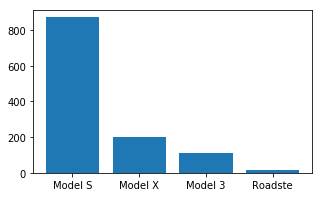

config
Base           155
75D            134
Performance    124
90D            105
85D             81
Name: config, dtype: int64


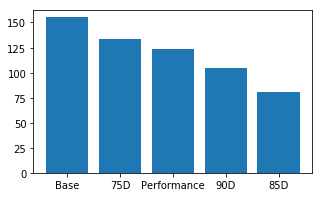

ext_color
Black     356
White     201
Silver    177
Blue      150
Gray      144
Name: ext_color, dtype: int64


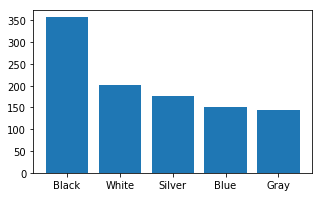

owners
1              723
more than 1    479
Name: owners, dtype: int64


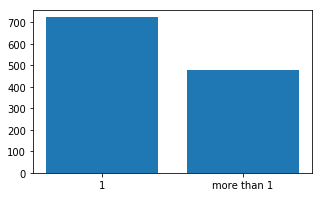

deal
Good          741
not_rating    204
Fair          182
Great          75
Name: deal, dtype: int64


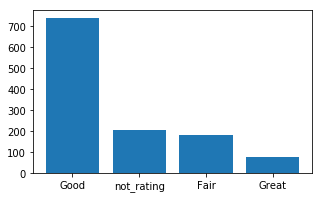

hotornot
NOT HOT    1073
HOT CAR     129
Name: hotornot, dtype: int64


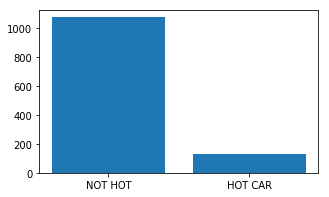

In [222]:
categories = ['year', 'model','config', 'ext_color', 'owners', 'deal', 'hotornot']

for i, c in enumerate(categories):
    v = cars2[c].unique()
    
    g = cars2.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

In [205]:
cargurus1.describe()

,carYear,mileage,daysOnMarket,ownerCount,price,msrpString,sellerRating,dealScore,priceDifferential,expectedPrice
count,1099.000000,1097.000000,1099.000000,1094.000000,1099.000000,286.000000,1027.000000,1099.000000,1099.000000,1099.000000
mean,2014.924477,38623.813127,91.938126,1.368373,48106.061865,65701.139860,4.346806,0.092459,5358.194258,46924.792539
std,1.619758,23746.837581,110.936499,0.636310,16238.237643,22229.061147,0.413471,0.820963,11077.035051,18234.779437
min,2012.000000,396.000000,0.000000,1.000000,-1.000000,0.000000,2.000000,-2.741860,0.000000,-1.000000
25%,2013.000000,21530.000000,13.000000,1.000000,37999.000000,46998.500000,4.120000,-0.366825,1041.500000,37987.000000
50%,2015.000000,34335.000000,40.000000,1.000000,44988.000000,65111.500000,4.440000,0.059005,2182.000000,44352.000000
75%,2016.000000,50245.000000,139.000000,2.000000,54186.000000,79791.000000,4.620000,0.643966,4066.000000,54842.500000
max,2018.000000,238865.000000,612.000000,4.000000,119999.000000,158450.000000,5.000000,2.435697,92981.000000,124025.000000


In [226]:
cargurus1.isnull().sum()

carYear                    0
modelName                  0
trimName                  75
mileage                    2
wheelSystem              105
exteriorColorName          0
fleet                      2
hasAccidents               0
Date                       0
daysOnMarket               0
ownerCount                 5
price                      0
msrpString               813
savingsRecommendation      0
serviceProviderName       61
sellerRating              72
dealScore                  0
sellerCity                 0
priceDifferential          0
expectedPrice              0
vehicleIdentifier          0
dtype: int64

In [227]:
cargurus1['fleet'] = cargurus1['fleet'].fillna(False)
cargurus1['ownerCount'] = cargurus1['ownerCount'].fillna(1)

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


carYear
2015    263
2013    235
2016    192
2014    162
2017    126
Name: carYear, dtype: int64


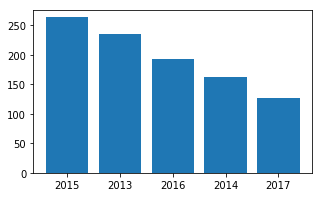

trimName
60 RWD             145
85 RWD             134
Performance RWD    107
85D AWD             89
75D AWD             79
Name: trimName, dtype: int64


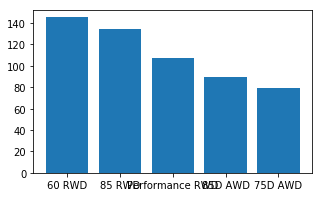

exteriorColorName
Black     312
White     176
Blue      142
Silver    132
Gray      125
Name: exteriorColorName, dtype: int64


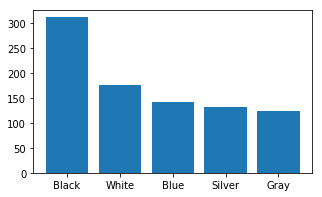

fleet
False    831
True     268
Name: fleet, dtype: int64


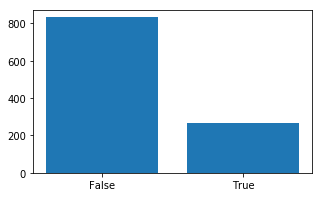

hasAccidents
False    909
True     190
Name: hasAccidents, dtype: int64


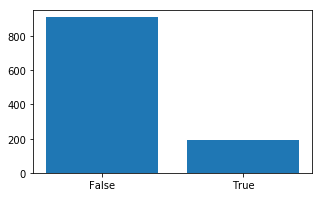

ownerCount
1.0    782
2.0    239
3.0     70
4.0      8
Name: ownerCount, dtype: int64


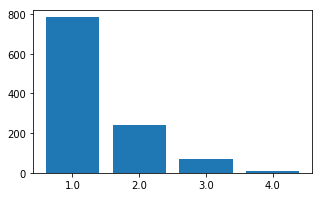

In [229]:
categories = ['carYear', 'trimName', 'exteriorColorName','fleet','hasAccidents', 'ownerCount']

for i, c in enumerate(categories):
    v = cargurus1[c].unique()
    
    g = cargurus1.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

In [231]:
cars2.to_csv('cleaned_cars.csv')
cargurus1.to_csv('cleaned_cargurus.csv')